<a href="https://colab.research.google.com/github/supsi-dacd-isaac/TeachDecisionMakingUncertainty/blob/main/FORM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
## Introduction

In many engineering and scientific applications, it is critical to evaluate the reliability of a system or component under uncertain conditions. This reliability is often expressed as the probability that a system's performance meets or exceeds certain criteria. In this problem, we focus on estimating the probability of unsatisfactory performance, e.g., a failue, defined as the probability that a performance function $ g(x) $ falls below a specified threshold.

We consider a system/model whose performance is characterized by a function $ g(x;\theta) $, where $\theta$ are model parameters and $x$ are random variables distributed as $f_X(x)$. A model with parameters $\theta$ fails to perfom adequatelly in $x$ if $ g(x;\theta) \leq 0 $.

We are interested in quantifying the probability
$$P_f(\theta) = \mathbb{P}[g(x;\theta) \leq 0]= \int\limits_{g(x;\theta)\leq 0} f_X(x) dx, $$
which is an useful indicator to help with the selection of a good $\theta$.  

---

## **Examples of performance function, $g(x; \theta)$**

### 1. **Structural Reliability (Structures/Loads)**
In structural engineering, the performance function $g(x; \theta)$ often represents the difference between the **resistance** of a structure and the **stress/load** applied to it:
$$
g(x; \theta) = \text{Resistance}(\theta) - \text{Stress}(x).
$$

In this example:
- $\theta$ represents the parameters defining the structure and affecting its resistance (e.g., material and geometical properties, like ticknes or elasticity).
- $x$ represents the random variables describing nosiy and variable operational conditions, different applied loads, environmental conditions and stresors, etc.

Hence, $g \leq 0$ represent 'hard' failures for the system, which occur when $\text{Stress}(x) \geq \text{Resistance}(\theta)$, this indicates that the stress exceeds the resistance.



### 2. **Machine Learning Models (Predictors)**
In ML, the performance function $g(x; \theta)$ could represent the difference between a **point-wise prediction metric** and an acceptable **threshold** that defines good/bad performance:
$$
g(x; \theta) = \text{Metric}(\theta, x) - \text{Threshold}(\theta, x),
$$
where:
- $\theta$ represents the model parameters (e.g., weights in a neural network, coefficients in a regression model, etc).
- $x$ represents the input data (including predicted features or classes).
- $\text{Metric}(\theta, x) = |y-\hat{y}(x;\theta)|$ the absolute prediction error

---


## Problem Description

We consider a system/model whose performance is characterized by a function $ g(x) $, where $ x=(x_1, x_2) $ are random variables distributed as $f_X(x)$. Specifically for these we assume:
- $ x_1 $ follows a normal distribution with mean $ \mu_{x_1} = 2 $ and standard deviation $\sigma_{x_1} = 0.7 $.
- $ x_2 $ follows a normal distribution with mean $ \mu_{x_2} = 3 $ and standard deviation $ \sigma_{x_2} = 2 $.
- $ x_1 $ and $ x_2 $ are independent

The performance function $ g(x_1, x_2) $ is defined as:
$$
g(x; \theta) = (x_1 + 3 + \theta_2 \theta_1)^2 + 3\theta_1 (x_2 + 2)^2 - 12,
$$
where $ \theta = (\theta_1, \theta_2)$ is a parameter vector (default set to 1) which can be later tuned to optimize the system.

## Objective

We will use two approaches to estiamate $P_f$:
1. **Monte Carlo Simulation**: A straightforward numerical method that relies on random sampling to estimate the probability.
2. **First-Order Reliability Method (FORM)**: An analytical approximation method that transforms the problem into a standard normal space and uses optimization to find the most probable point of failure.

The results from both methods will be compared to evaluate their accuracy and efficiency.

## Expected Outcomes

1. An estimate of the probability of failure $ \mathbb{P}[g(x_1, x_2) \leq 0] $ using Monte Carlo simulation.
2. An estimate of the same probability using FORM.
3. A comparison of the two methods in terms of accuracy, computational cost, and ease of implementation.
4. Visualization of the failure region and samples from the joint distribution of $ x_1 $ and $ x_2 $.

This problem provides a practical framework for understanding reliability analysis and the trade-offs between numerical and analytical methods in probabilistic risk assessment.

Monte Carlo Estimate of P[g(x) <= 0]: 1.66e-06


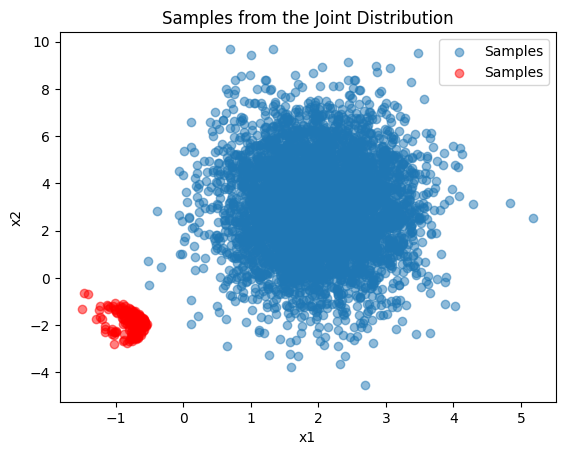

In [18]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
import scipy.stats as stats

# Define the Performance Function g(x)
def g_fun(x1, x2, params=None):
    """
    Performance function g(x).
    Args:
        x1, x2: Input variables.
        params: Optional design parameters for the function.
    Returns:
        Value of the performance function.
    """
    if params is None:
        params = [1, 1]

    return (x1 + 3 + params[1] * params[0])**2 + params[0] * 3 * (x2 + 2)**2 - 12

# Define the Indicator Function I(x)
def I(x1, x2):
    """
    Indicator function I(x).
    Args:
        x1, x2: Input variables.
    Returns:
        1 if g(x) <= 0 (bad performance), 0 otherwise.
    """
    return g_fun(x1, x2) <= 0

# Define the Joint Probability Distribution f(x1, x2)
# Define distribution parameters
mu_x1, mu_x2 = 2, 3
sigma_x1, sigma_x2 = 0.7, 2

# Define normal distribution objects
f_x1 = stats.norm(loc=mu_x1, scale=sigma_x1)
f_x2 = stats.norm(loc=mu_x2, scale=sigma_x2)

# Joint PDF
def joint_pdf(x1, x2, dist_obj_x1, dist_obj_x2):
    """
    Joint PDF of x1 and x2.
    Args:
        x1, x2: Input variables.
        dist_obj_x1, dist_obj_x2: Distribution objects for x1 and x2.
    Returns:
        Value of the joint PDF.
    """
    return dist_obj_x1.pdf(x1) * dist_obj_x2.pdf(x2)

# Joint CDF
def joint_cdf(x1, x2, dist_obj_x1, dist_obj_x2):
    """
    Joint CDF of x1 and x2.
    Args:
        x1, x2: Input variables.
        dist_obj_x1, dist_obj_x2: Distribution objects for x1 and x2.
    Returns:
        Value of the joint CDF.
    """
    return dist_obj_x1.cdf(x1) * dist_obj_x2.cdf(x2)

# Monte Carlo Estimation
sample_size =  100_000_000
samples_x1 = f_x1.rvs(size=sample_size)
samples_x2 = f_x2.rvs(size=sample_size)
Indicator_function = I(samples_x1, samples_x2)
pof_mc_estimate = np.mean(Indicator_function)

print(f"Monte Carlo Estimate of P[g(x) <= 0]: {pof_mc_estimate}")

# Visualization
# Plot samples
plt.scatter(samples_x1[:5000], samples_x2[:5000], alpha=0.5, label="Samples")
plt.scatter(samples_x1[Indicator_function==1], samples_x2[Indicator_function==1], alpha=0.5, c='r', label="Samples")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Samples from the Joint Distribution')
plt.legend()
plt.show()

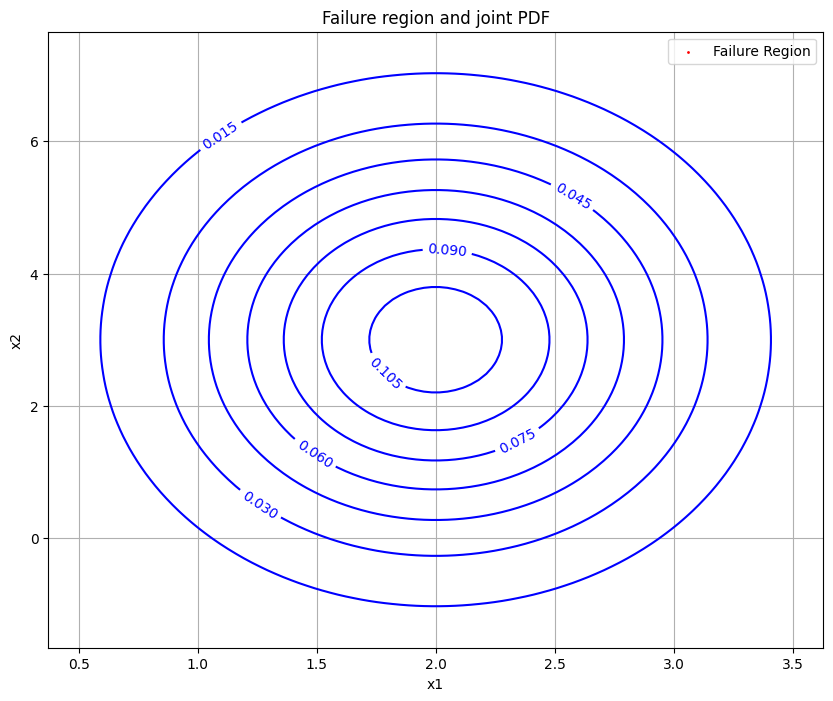

In [10]:
# Create a grid of points for x1 and x2
x1_range = np.linspace(f_x1.ppf(0.01), f_x1.ppf(0.99), 100)
x2_range = np.linspace(f_x2.ppf(0.01), f_x2.ppf(0.99), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)


# Calculate the joint probability density function (PDF)
f_x1_x2 = f_x1.pdf(X1) * f_x2.pdf(X2)



# Plot the iso-probability curves of f(x1, x2)
plt.figure(figsize=(10, 8))
CS = plt.contour(X1, X2, f_x1_x2, levels=7, colors='blue')
plt.clabel(CS, inline=1, fontsize=10)

# Plot the failure region defined by I(x)
failure_region = np.where(I(X1, X2) == 1)
plt.scatter(X1[failure_region], X2[failure_region], color='red', s=1, label='Failure Region')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Failure region and joint PDF')
plt.legend()
plt.show()

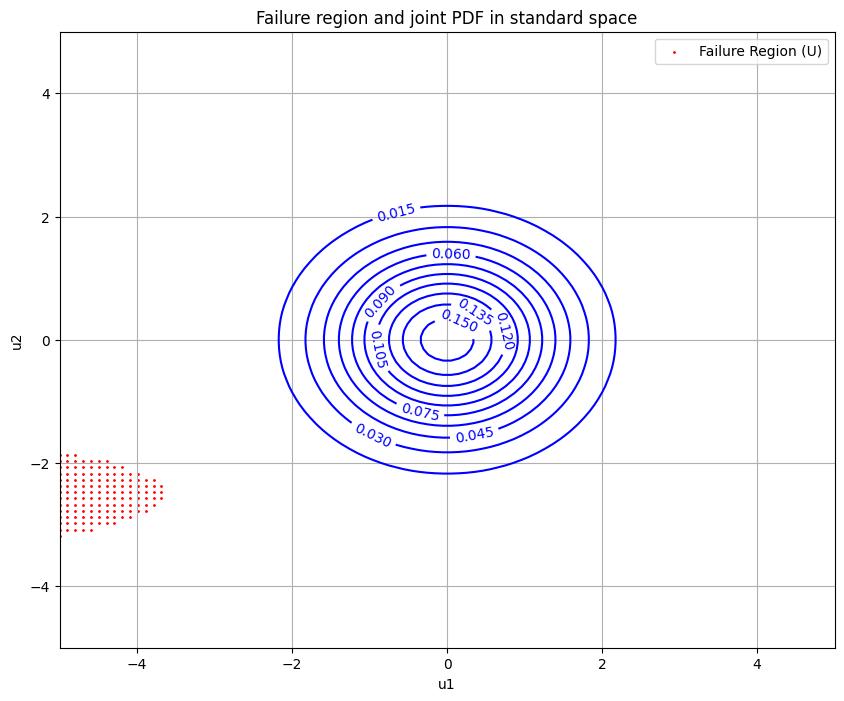

In [7]:
# Now let us apply a transformation on x to standardize it

# Data transformation to standard space: x -> u Hasofer-Lind 2nd Moment transformation (many others)
U1 = (X1 - mu_x1) / sigma_x1
U2 = (X2 - mu_x2) / sigma_x2


# Transform g(x) to g(u)
def g_u(u1, u2):
    x1 = u1 * sigma_x1 + mu_x1
    x2 = u2 * sigma_x2 + mu_x2
    return g_fun(x1, x2)

# Define the indicator function in the standard space
def I_u(u1,u2):
    return g_u(u1,u2) <= 0

# Calculate the joint PDF in the standard space
f_u1_u2 = norm.pdf(U1, loc=0, scale=1) * norm.pdf(U2, loc=0, scale=1)

# Plot I(u) and f(u)
plt.figure(figsize=(10, 8))
CS = plt.contour(U1, U2, f_u1_u2, levels=10, colors='blue')
plt.clabel(CS, inline=1, fontsize=10)

failure_region_u = np.where(I_u(U1, U2) == 1)
plt.scatter(U1[failure_region_u], U2[failure_region_u], color='red', s=1, label='Failure Region (U)')
plt.grid()
plt.xlabel('u1')
plt.ylabel('u2')
plt.title('Failure region and joint PDF in standard space')
plt.legend()
plt.show()

In [1]:
import numpy as np
from scipy.stats import norm, lognorm
from scipy.optimize import minimize


# Define the Rosenblatt transformation
def ros_transformation(x1, x2, mu_x1, sigma_x1, mu_x2, sigma_x2):
    # Apply the CDF transformations to get U1 and U2
    F_X1 = norm.cdf(x1, loc=mu_x1, scale=sigma_x1)
    F_X2 = norm.cdf(X2, loc=mu_x2, scale=sigma_x2)

    # Apply the inverse CDF to get the standard normal variables
    U1 = norm.ppf(F_X1)
    U2 = norm.ppf(F_X2)

    return U1, U2

# Define the optimization function to find the MPP
def mpp_optimization(mu_x1, sigma_x1, mu_x2, sigma_x2):
    # Objective function to minimize (norm of u)
    def objective(u):
        return np.linalg.norm(u)

    # Constraint function (g(u) = 0)
    def constraint(u):
        x1 = norm.ppf(norm.cdf(u[0])) * sigma_x1 + mu_x1
        x2 = lognorm.ppf(norm.cdf(u[1]), s=sigma_x2, scale=np.exp(mu_x2))
        return g(x1, x2)

    # Initial guess (start near the origin)
    u_init = np.array([0, 0])

    # Define the constraint dictionary
    cons = ({'type': 'eq', 'fun': constraint})

    # Perform optimization (search for MPP)
    result = minimize(objective, u_init, constraints=cons, bounds=[(-10, 10), (-10, 10)], method='SLSQP')

    # Get the MPP
    u_mpp = result.x
    return u_mpp

# Define the function to calculate the reliability
def calculate_reliability(beta):
    # Reliability is the CDF of the standard normal evaluated at beta
    return norm.cdf(beta)


# Define the main function to execute FORM
def FORM(mu_x1, sigma_x1, mu_x2, sigma_x2):
    # Step 1: Find the MPP in U-space
    u_mpp = mpp_optimization(mu_x1, sigma_x1, mu_x2, sigma_x2)

    # Step 2: Calculate the reliability index beta
    beta = np.linalg.norm(u_mpp)  # Reliability index is the distance from the origin

    # Step 3: Calculate the reliability
    reliability = calculate_reliability(beta)
    pof = 1- reliability
    return beta, reliability, pof


# Define the main function to execute FORM
def MonteCarloSampling(mu_x1, sigma_x1, mu_x2, sigma_x2):
    # Step 1: Find the MPP in U-space
    u_mpp = mpp_optimization(mu_x1, sigma_x1, mu_x2, sigma_x2)

    # Step 2: Calculate the reliability index beta
    beta = np.linalg.norm(u_mpp)  # Reliability index is the distance from the origin

    # Step 3: Calculate the reliability
    reliability = calculate_reliability(beta)

    pof = 1- reliability
    return beta, reliability, pof

# Define the parameters of the distributions
mu_x1, sigma_x1 = 2, 1  # Normal distribution parameters
mu_x2, sigma_x2 = 0.5, 0.2  # Lognormal distribution parameters

# Perform FORM analysis
beta, reliability, pof = FORM(mu_x1, sigma_x1, mu_x2, sigma_x2)

print("Reliability Index (beta):", beta)
print("Reliability (R):", reliability)
print("Unreliability (Pf):", pof)

NameError: name 'g' is not defined

In [ ]:
F_X1

### Problem Explanation

In this example, we are analyzing the failure mode of a cantilever beam, where the failure occurs if the tip displacement exceeds an allowable value \(D_0 = 3\) inches. The performance function is given by:

\[
g(D) = D_0 - \frac{4 P_x P_y L^3}{E w t^3}
\]

Where:
- \( E = 30 \times 10^6 \) psi is the modulus of elasticity,
- \( L = 100 \) inches is the length of the beam,
- \( w = 2 \) inches and \( t = 4 \) inches are the width and height of the cross section, respectively,
- \( P_x \sim N(500, 100) \) lb is the normal distribution of the external force in the x-direction,
- \( P_y \sim N(1000, 100) \) lb is the normal distribution of the external force in the y-direction,
- \( D_0 = 3 \) inches is the allowable tip displacement.

We will estimate the probability of failure by generating random samples for the forces \( P_x \) and \( P_y \) using Monte Carlo simulation. The failure occurs when the performance function \( g(D) \) is less than or equal to zero, which we will calculate for a large number of random samples.

The results will be visualized using a histogram to show the distribution of the performance function and the probability of failure.


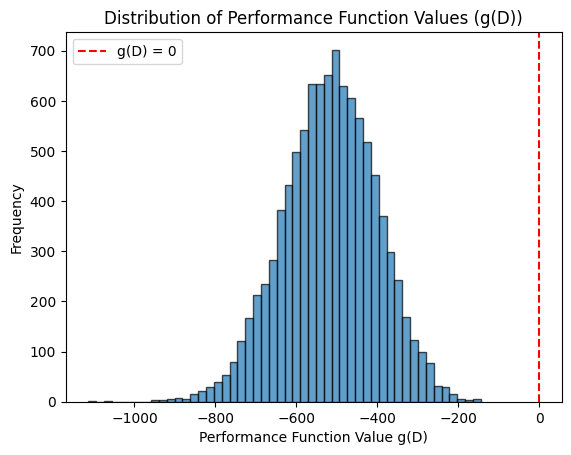

Estimated probability of failure: 1.0000


In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Given constants
E = 30e6  # Modulus of elasticity (psi)
L = 100   # Length of the beam (inches)
D0 = 3    # Allowable tip displacement (inches)
w = 2     # Width of the cross section (inches)
t = 4     # Height of the cross section (inches)

# External forces Px and Py with normal distributions
mean_Px = 500  # Mean of Px (lb)
std_Px = 100   # Standard deviation of Px (lb)

mean_Py = 1000 # Mean of Py (lb)
std_Py = 100   # Standard deviation of Py (lb)

# Define performance function (g function)
def performance_function(Px, Py):
    # Displacement formula from the given equation
    displacement = (4 * Px * Py * L**3) / (E * w * t**3)
    return D0 - displacement  # Performance function g(D)

# Generate random samples of Px and Py from normal distributions
num_samples = 10000  # Number of samples for Monte Carlo simulation
Px_samples = np.random.normal(mean_Px, std_Px, num_samples)
Py_samples = np.random.normal(mean_Py, std_Py, num_samples)

# Compute the performance function for each sample
g_values = performance_function(Px_samples, Py_samples)

# Plotting the results (distribution of performance function values)
plt.hist(g_values, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label="g(D) = 0")
plt.xlabel('Performance Function Value g(D)')
plt.ylabel('Frequency')
plt.title('Distribution of Performance Function Values (g(D))')
plt.legend()
plt.show()

# Calculate probability of failure (g(D) <= 0)
failure_probability = np.mean(g_values <= 0)
print(f'Estimated probability of failure: {failure_probability:.4f}')
